# **Assignment 1: ML Data Cleaning and Feature Selection**

Author: Aashay Pawar

NUID: 002134382

Task:

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.


In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

#**About the Dataset**

The dataset contains various details about vehicles, including car name, price in rupees, kilometers driven, fuel type, transmission type, ownership status, manufacture year, engine specifications, and number of seats. It is an open dataset that can be accessed on Kaggle, and a snapshot of the same dataset is also available on my GitHub page. The file is in CSV format, which makes it easy to import and analyze using various software tools.


Kaggle: https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

Github: https://github.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods

# Importing Libraries

In [192]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io

import warnings 
warnings.filterwarnings("ignore")

# Loading Dataset

In [193]:
# Loading the dataset in a pandas data frame variable 'df' and checking the dtype
df = pd.read_csv('https://raw.githubusercontent.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods/main/car_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


We run df.info() to check the datatype of the column variables.

In [194]:
#checking null values
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

The outputs indicates that there are no missing values in any of the columns.

In [195]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


Here we can see that some variables are either not needed or not in correct format.


1.   'Unnamed: 0' and 'car_name' are unwanted variable.
2.   Variables 'car_prices_in_rupee', 'kms_driven', 'ownership', 'manufacture', and 'engine' are expected to be in integer type.
3.   Instead of manufacture, there can be a column 'age'.


So we now try to drop, alter, and create the required columns.

# Data Pre-processing

In [196]:
# CAR PRICE
# iterate over each value in the 'car_prices_in_rupee' column
for i, value in enumerate(df['car_prices_in_rupee']):
        # check if the value contains 'Lakh'
        if 'Lakh' in value:
            # replace 'Lakh' with an empty string
            value = value.replace('Lakh', '')
            # convert the value to a float
            value = int(float(value) * 100000)
        # check if the value contains 'Crore'
        elif 'Crore' in value:
            # replace 'Crore' with an empty string
            value = value.replace('Crore', '')
            # convert the value to a float
            value = int(float(value) * 10000000)
        # update the value in the dataframe
        df.at[i, 'car_prices_in_rupee'] = value
        
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(',', '')
df['car_prices_in_rupee'] = pd.to_numeric(df['car_prices_in_rupee'], errors='coerce')
df.dropna(subset=['car_prices_in_rupee'], inplace=True)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('int64')

# KILOMETERS DRIVEN    
df['kms_driven'] = df['kms_driven'].str.replace('kms', '').str.replace(',', '').astype(int)

# OWNERSHIP TYPE    
df['ownership'] = df['ownership'].replace({'1st Owner': 1, '2nd Owner': 2,'3rd Owner': 3, '4th Owner': 4, '5th Owner': 5, '0th Owner': 0}).astype(int)

# ENGINE CAPACITY IN CC
df['engine'] = df['engine'].str.replace('cc', '').astype(int)

#calculating car age
df['age']=2023- df['manufacture']

#dropping unnecessary feature
df.drop(labels= ['Unnamed: 0'], axis= 1, inplace= True)          
df.drop(labels= ['car_name'], axis= 1, inplace= True)
df.drop(labels= ['manufacture'], axis= 1, inplace= True) 

In [197]:
# Checking if the dataset is as desired
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,age
238,99999,80000,Petrol,Manual,3,1298,5 Seats,16
243,55000,90000,Petrol,Manual,3,993,5 Seats,21
342,84778,70229,Petrol,Manual,4,796,5 Seats,15
675,59000,60000,Petrol,Manual,1,1497,5 Seats,16
734,90000,80000,Petrol,Manual,2,2993,5 Seats,15


In [198]:
# Checking if the dataset has no null values
df.isnull().sum()

car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
engine                 0
Seats                  0
age                    0
dtype: int64

In [199]:
# Checking the dataype of column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_prices_in_rupee  123 non-null    int64 
 1   kms_driven           123 non-null    int64 
 2   fuel_type            123 non-null    object
 3   transmission         123 non-null    object
 4   ownership            123 non-null    int64 
 5   engine               123 non-null    int64 
 6   Seats                123 non-null    object
 7   age                  123 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 8.6+ KB


From the above results, we can say that our dataset is ready in desired format for the upcoming operations.

# Checking Independent Variable Distribution

## What Q-Q Plot means

Our target variable is the 'car_prices_in_rupee' which we wish to predict using the rest of the variables. So we try plotting Q-Q Plots of 'car_prices_in_rupee' against all available variables and check the results.

A response from chat GPT of **What Q-Q Plot means**:


1.   A Q-Q plot (Quantile-Quantile plot) is a graphical method to compare the distribution of a sample with a known probability distribution.

2.   It is a plot of the quantiles of the sample data against the corresponding quantiles of the theoretical distribution. The theoretical distribution is typically the normal distribution, but it can be any distribution with a known quantile function.

3.   The Q-Q plot is useful for assessing whether a dataset follows a certain distribution or not. If the points in the plot lie close to the diagonal line, it suggests that the sample distribution is similar to the theoretical distribution. If the points deviate from the line, it suggests that the sample distribution does not follow the theoretical distribution.

4.   Q-Q plots can also be used to compare two datasets. In this case, one dataset is plotted on the x-axis, and the other dataset is plotted on the y-axis. If the points in the plot lie close to the diagonal line, it suggests that the two datasets have similar distributions. If the points deviate from the line, it suggests that the two datasets have different distributions.

5.   Overall, Q-Q plots provide a visual way to check the assumption of normality or to compare the distributions of two datasets.

## How to read and understand a Q-Q Plot?

A response from chatGPT says:
In a Q-Q plot, there are several parameters that are used to create the plot:

1.   The x-axis and y-axis: The x-axis represents the quantiles of the sample data, and the y-axis represents the quantiles of the theoretical distribution.

2.   The line: The diagonal line represents the perfect agreement between the sample and theoretical distributions. If the plotted points lie on this line, it suggests that the sample distribution and the theoretical distribution are identical.

3.   The plotted points: The plotted points represent the quantiles of the sample data and the corresponding quantiles of the theoretical distribution. Each point represents a pair of quantiles (x, y), where x is the quantile of the sample data and y is the corresponding quantile of the theoretical distribution.

4.   The shaded area: The shaded area represents the confidence interval for the plotted points. The confidence interval is usually set to 95%, and it represents the range within which the plotted points are expected to lie if the sample distribution and the theoretical distribution are identical.

To interpret the Q-Q plot, you need to compare the plotted points with the diagonal line. If the plotted points are close to the line, it suggests that the sample distribution and the theoretical distribution are similar. If the plotted points deviate from the line, it suggests that the sample distribution and the theoretical distribution are different. The degree of deviation and the direction of the deviation provide information about the nature of the difference between the distributions.

## Q-Q Plots for given dataset

Q-Q graphs can only be plotted between numerical values. In our dataset, numerical values are:

"kms_driven", "ownership", "engine", "age"

So graphs can be plotted between "kms_driven", "ownership", "engine", "age" and "car_prices_in_rupee"

<Figure size 800x500 with 0 Axes>

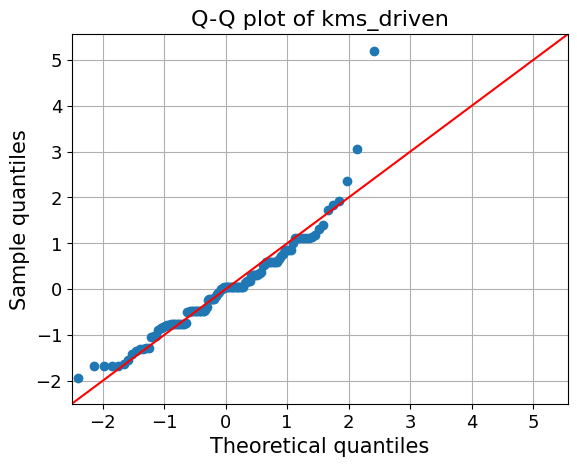

<Figure size 800x500 with 0 Axes>

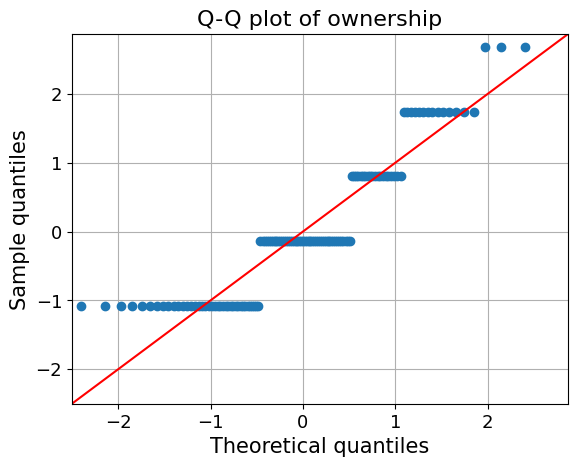

<Figure size 800x500 with 0 Axes>

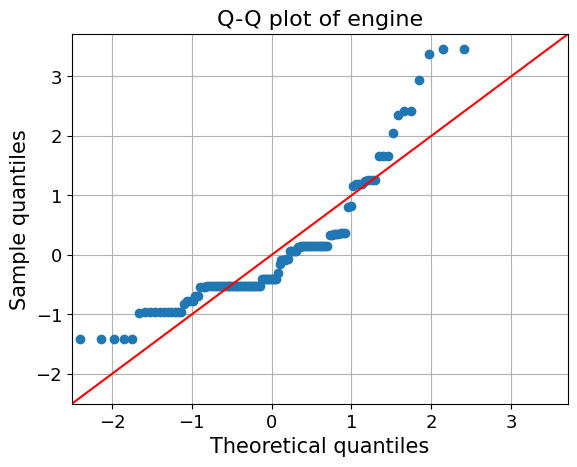

<Figure size 800x500 with 0 Axes>

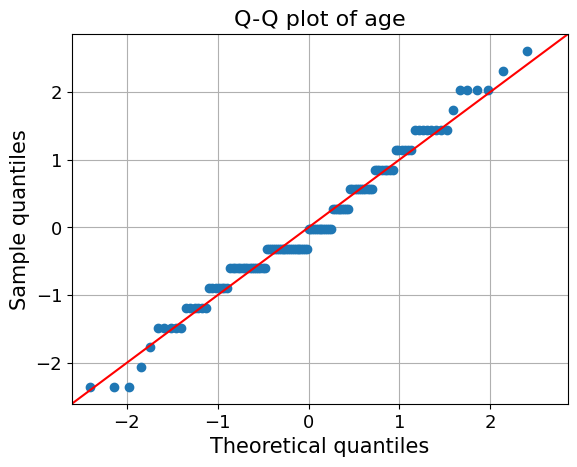

In [200]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = df[
    ["kms_driven", "ownership", "engine", "age"]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

## Conclusion from Q-Q Plots

Q-Q Plots for:
1.   kms_driven: follows normal distribution with some outliers
2.   ownership: follows normal distribution with many outliers
3.   engine: follows normal distribution with many outliers
4.   age: follows normal distribution with very less outliers

# Data transforming, Feature creation and Analysis

Since "car_prices_in_rupee" and "kms_driven" are too high, we try to normalise them in ranges according to data.

In [201]:
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and categorical features
numeric_features = ['kms_driven', 'engine', 'age', 'car_prices_in_rupee']
categorical_features = ['fuel_type', 'transmission', 'ownership', 'Seats']

# Normalize numeric features
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# One-hot encode categorical features
data = pd.get_dummies(df, columns=categorical_features)

data.head()

,car_prices_in_rupee,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
238,1.000000,0.278402,0.228493,0.470588,0,0,1,0,1,0,0,1,0,0,0,1,0,0
243,0.307697,0.315741,0.089668,0.764706,0,0,1,0,1,0,0,1,0,0,0,1,0,0
342,0.765827,0.241918,0.000000,0.411765,0,0,1,0,1,0,0,0,1,0,0,1,0,0
675,0.369236,0.203724,0.319071,0.470588,0,0,1,0,1,1,0,0,0,0,0,1,0,0
734,0.846167,0.278402,1.000000,0.411765,0,0,1,0,1,0,1,0,0,0,0,1,0,0


# Finding correlation between variables

A response from ChatGPT say:

A **correlation matrix** is a table that displays the correlation coefficients between pairs of variables. Correlation coefficients measure the strength and direction of the linear relationship between two variables.

So we will run the following scripts to see and visualize the correlation between the variables.

In [202]:
# check the correlation matrix
data.corr()

,car_prices_in_rupee,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
car_prices_in_rupee,1.000000,0.044721,-0.082182,-0.258641,0.134793,0.027610,-0.128687,0.076434,-0.076434,-0.082082,-0.074339,0.182996,0.002437,0.039013,0.089467,0.033519,-0.085760,0.012199
kms_driven,0.044721,1.000000,-0.016314,0.081776,0.286547,0.092386,-0.294595,-0.043921,0.043921,-0.108133,0.017308,-0.039071,0.112074,0.134395,-0.028041,0.169998,-0.136812,-0.094636
engine,-0.082182,-0.016314,1.000000,-0.160428,-0.100711,0.154278,-0.013020,-0.047329,0.047329,-0.122717,0.223202,-0.074911,-0.051625,-0.047404,-0.078209,0.026425,0.035468,-0.059116
age,-0.258641,0.081776,-0.160428,1.000000,-0.081518,-0.125991,0.146041,0.077328,-0.077328,0.128210,-0.055854,0.035598,-0.164530,0.042765,0.053532,-0.062272,0.109705,-0.111039
fuel_type_Diesel,0.134793,0.286547,-0.100711,-0.081518,1.000000,-0.070969,-0.782557,-0.028373,0.028373,-0.091091,0.105349,0.016321,-0.022609,-0.049552,-0.040291,0.036494,0.001623,-0.049552
fuel_type_Lpg,0.027610,0.092386,0.154278,-0.125991,-0.070969,1.000000,-0.565472,-0.020502,0.020502,0.007913,0.054941,0.002495,-0.081158,-0.035806,-0.029114,-0.136827,0.061292,0.208867
fuel_type_Petrol,-0.128687,-0.294595,-0.013020,0.146041,-0.782557,-0.565472,1.000000,0.036257,-0.036257,0.070380,-0.121400,-0.015052,0.069349,0.063320,0.051487,0.055226,-0.039598,-0.089393
transmission_Automatic,0.076434,-0.043921,-0.047329,0.077328,-0.028373,-0.020502,0.036257,1.000000,-1.000000,-0.061690,-0.071197,-0.039895,0.252621,-0.014315,0.704203,-0.234127,-0.028373,-0.014315
transmission_Manual,-0.076434,0.043921,0.047329,-0.077328,0.028373,0.020502,-0.036257,-1.000000,1.000000,0.061690,0.071197,0.039895,-0.252621,0.014315,-0.704203,0.234127,0.028373,0.014315
ownership_1,-0.082082,-0.108133,-0.122717,0.128210,-0.091091,0.007913,0.070380,-0.061690,0.061690,1.000000,-0.535840,-0.300254,-0.244199,-0.107736,-0.087602,0.055738,-0.029866,0.005525


<Axes: >

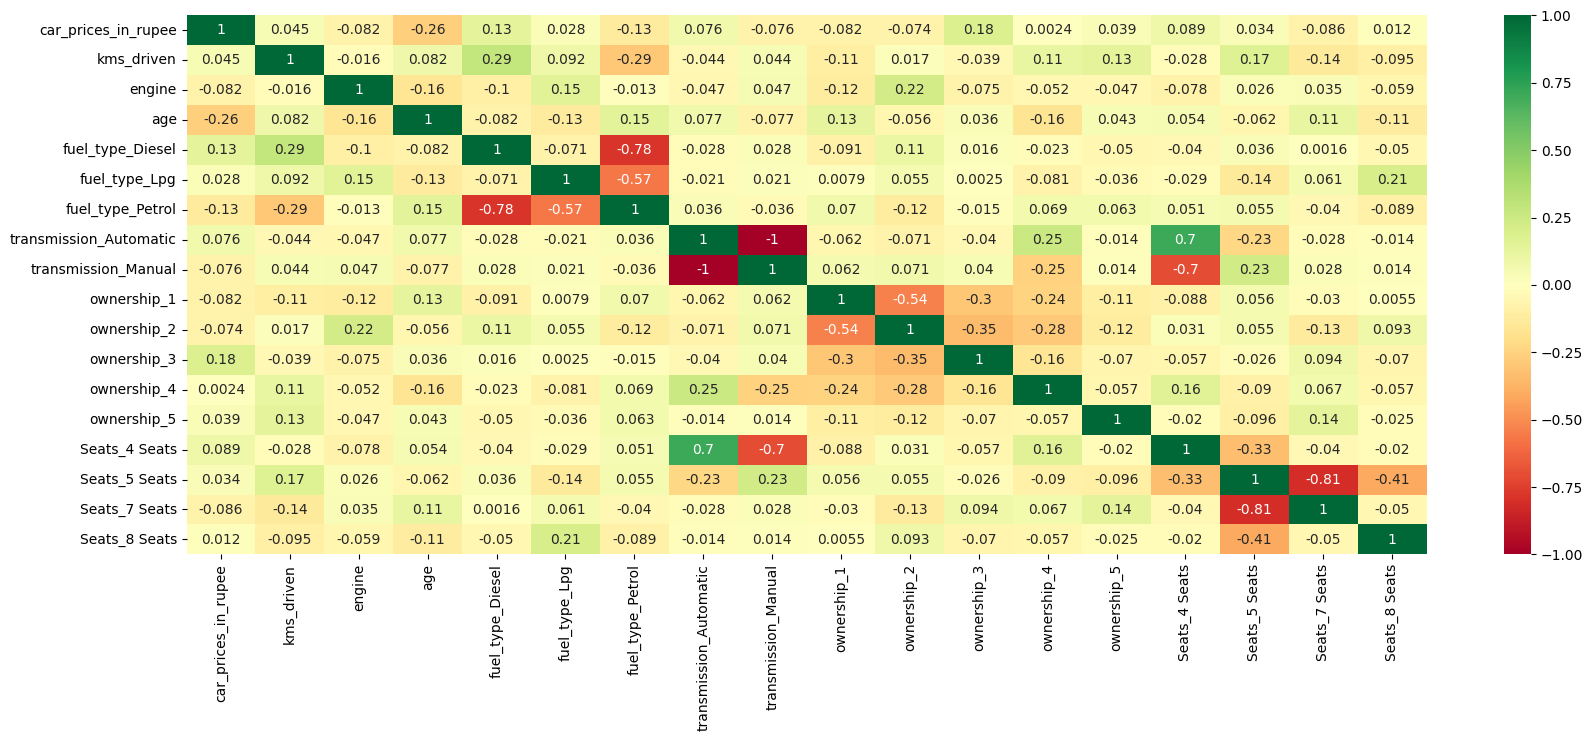

In [203]:
# visualizing the heat map of correlation matrix
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

From the above results, we can say that "age" has the best relation with "car_prices_in_rupee" inversely.

This means that when age of the car increases, its price drops.

# Identifing predictor significance

In [204]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data["car_prices_in_rupee"],
    data[
        [
            "kms_driven",
            "engine",
            "age",
            "fuel_type_Diesel", "fuel_type_Lpg",  "fuel_type_Petrol",
            "transmission_Automatic", "transmission_Manual",
            "ownership_1",  "ownership_2",  "ownership_3",  "ownership_4",  "ownership_5",
            "Seats_4 Seats",	"Seats_5 Seats",	"Seats_7 Seats",	"Seats_8 Seats"
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     car_prices_in_rupee   R-squared:                       0.153
Model:                             OLS   Adj. R-squared:                  0.052
Method:                  Least Squares   F-statistic:                     1.516
Date:                 Sun, 16 Apr 2023   Prob (F-statistic):              0.123
Time:                         02:08:04   Log-Likelihood:                 1.7357
No. Observations:                  123   AIC:                             24.53
Df Residuals:                      109   BIC:                             63.90
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
kms_driven                 0.0648      0.185      0.350      0.727      -0.302       0.431
engine                    -0.1109      0.120     -0.924      0.358      -0.349       0.127
age                       -0.3678      0.124     -2.969      0.004      -0.613      -0.122
fuel_type_Diesel           0.3083      0.081      3.792      0.000       0.147       0.469
fuel_type_Lpg              0.2381      0.095      2.519      0.013       0.051       0.425
fuel_type_Petrol           0.2166      0.062      3.512      0.001       0.094       0.339
transmission_Automatic     0.4682      0.244      1.919      0.058      -0.015       0.952
transmission_Manual        0.2948      0.138      2.135      0.035       0.021       0.568
ownership_1                0.1153      0.056      2.074      0.040       0.005       0.226
ownership_2                0.0990      0.056      1.757      0.082      -0.013       0.211
ownership_3                0.2458      0.063      3.908      0.000       0.121       0.370
ownership_4                0.0762      0.066      1.150      0.252      -0.055       0.207
ownership_5                0.2267      0.131      1.735      0.086      -0.032       0.486
Seats_4 Seats              0.3302      0.187      1.768      0.080      -0.040       0.700
Seats_5 Seats              0.1692      0.094      1.794      0.076      -0.018       0.356
Seats_7 Seats              0.1053      0.113      0.933      0.353      -0.118       0.329
Seats_8 Seats              0.1583      0.144      1.097      0.275      -0.128       0.444
==============================================================================
Omnibus:                        5.875   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.963
Skew:                          -0.536   Prob(JB):                       0.0507
Kurtosis:                       2.883   Cond. No.                     3.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We consider P>|t| to be less than 0.05 to be a significant feature. Since all the features except the "age" are greater than 0.05, they become insignificant.

**"age"** is the only significant variable according to this analysis.

# Building the model

## Train ,Validation and Test split

In [205]:
from sklearn.model_selection import train_test_split

X = data[
    [
        "kms_driven",
            "engine",
            "age",
            "fuel_type_Diesel", "fuel_type_Lpg",  "fuel_type_Petrol",
            "transmission_Automatic", "transmission_Manual",
            "ownership_1",  "ownership_2",  "ownership_3",  "ownership_4",  "ownership_5",
            "Seats_4 Seats",	"Seats_5 Seats",	"Seats_7 Seats",	"Seats_8 Seats"
    ]
]

y = data["car_prices_in_rupee"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

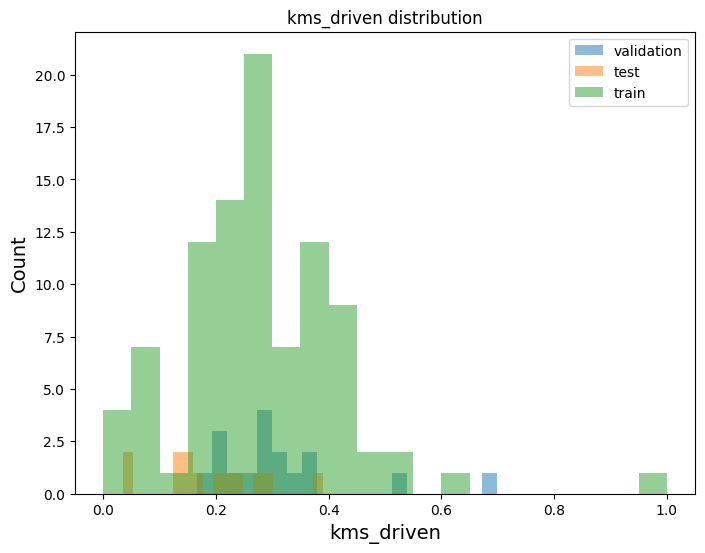

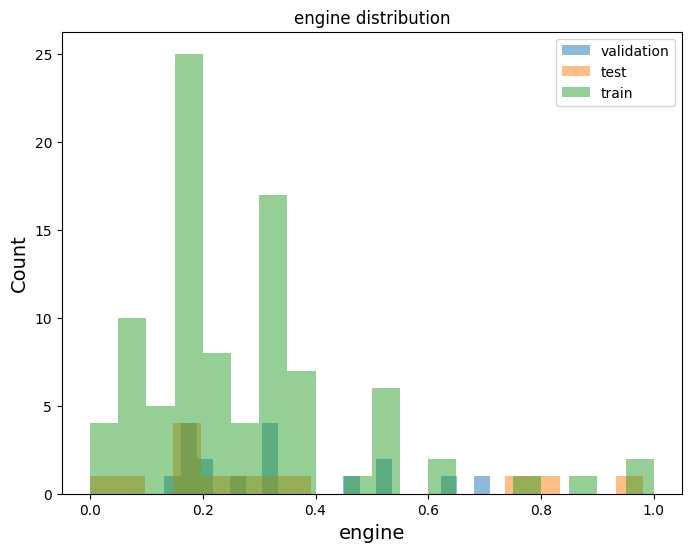

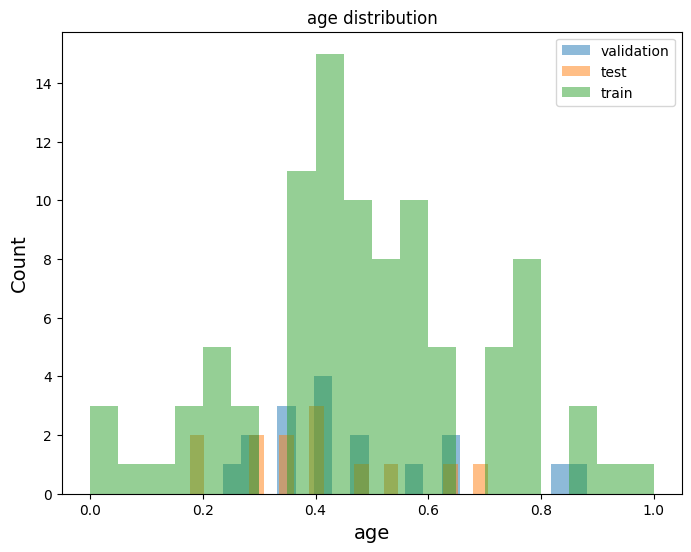

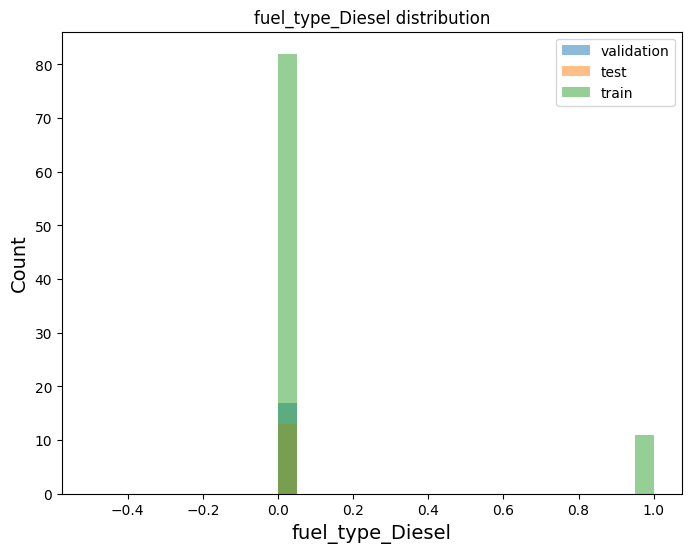

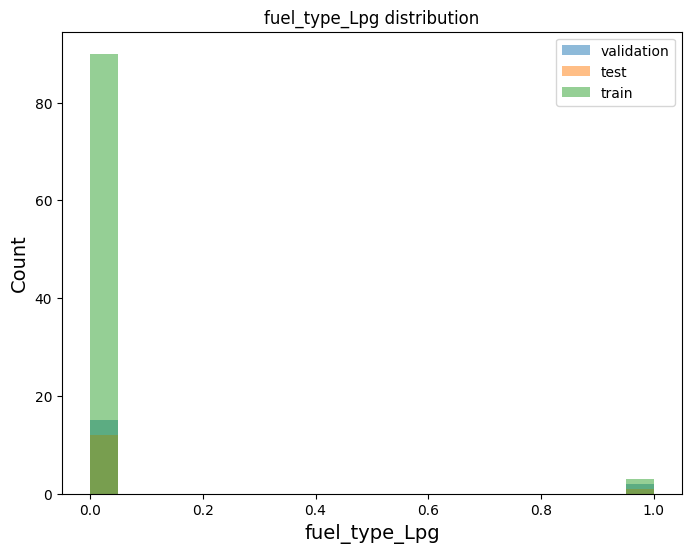

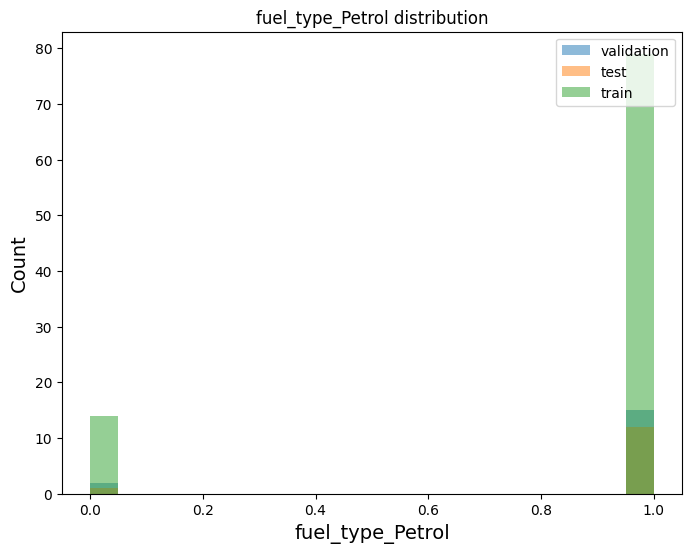

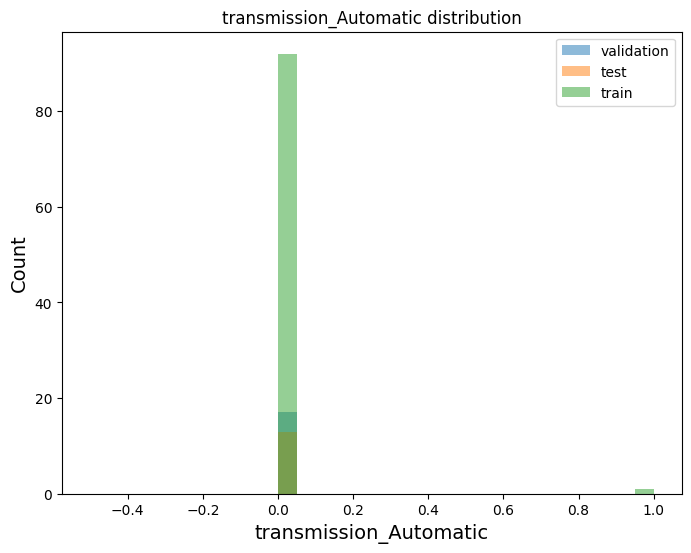

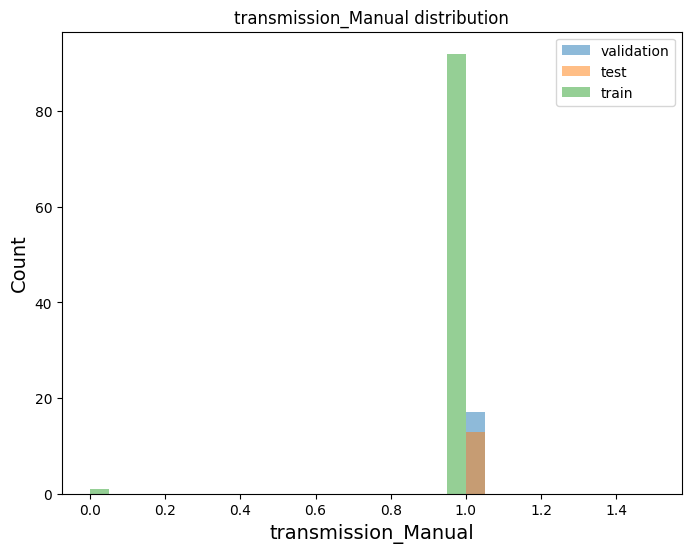

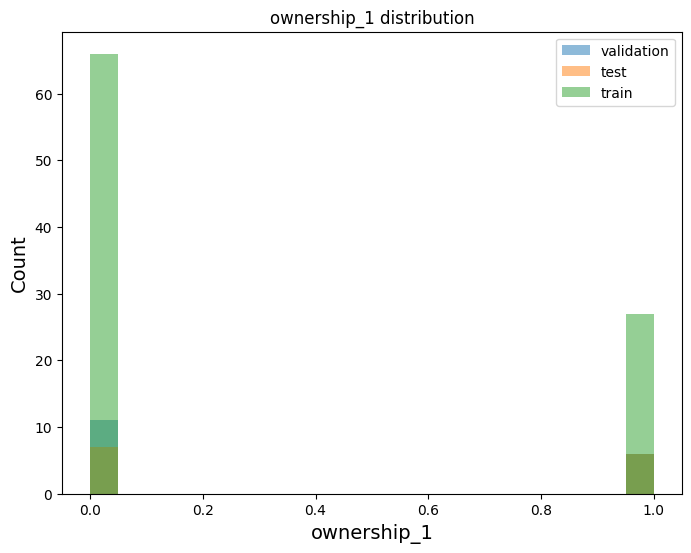

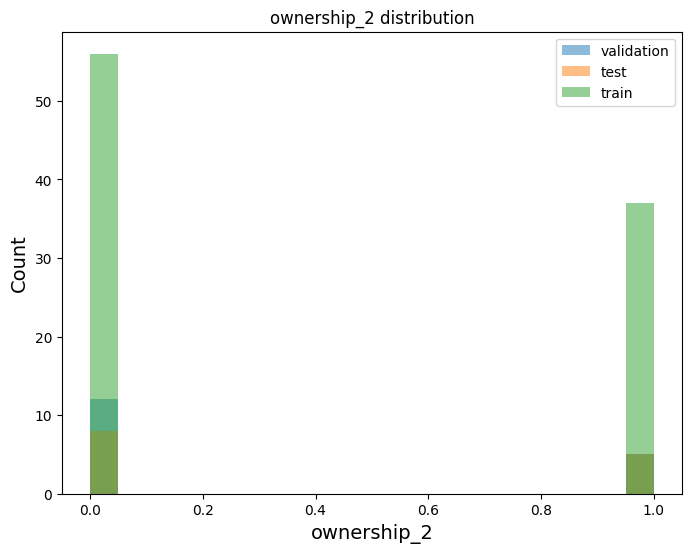

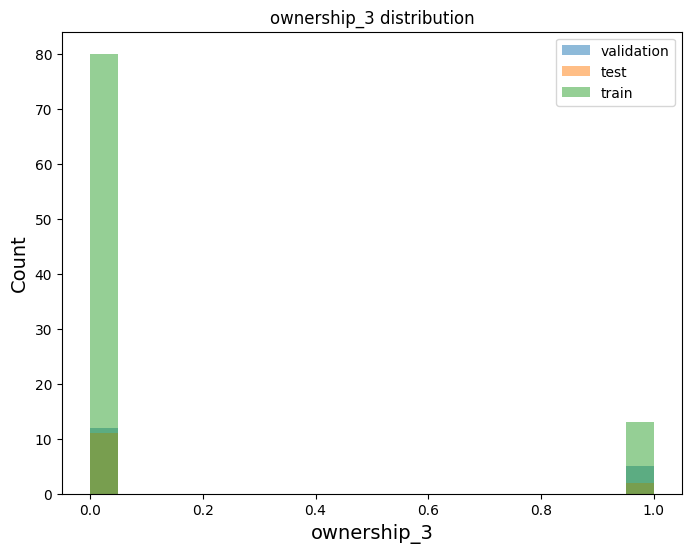

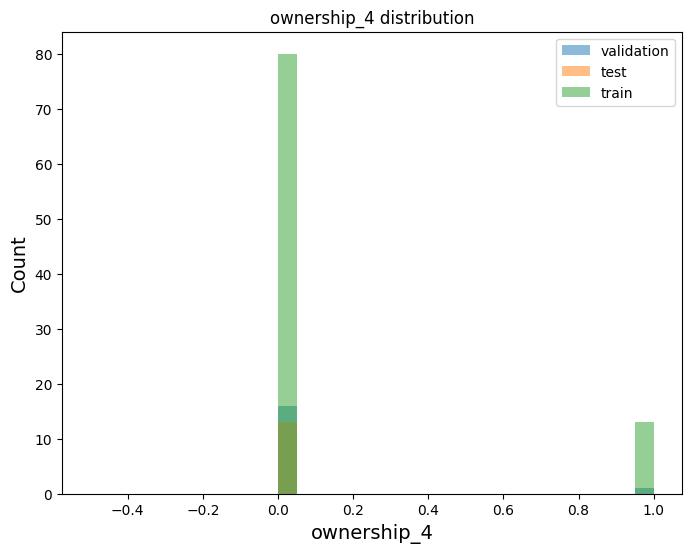

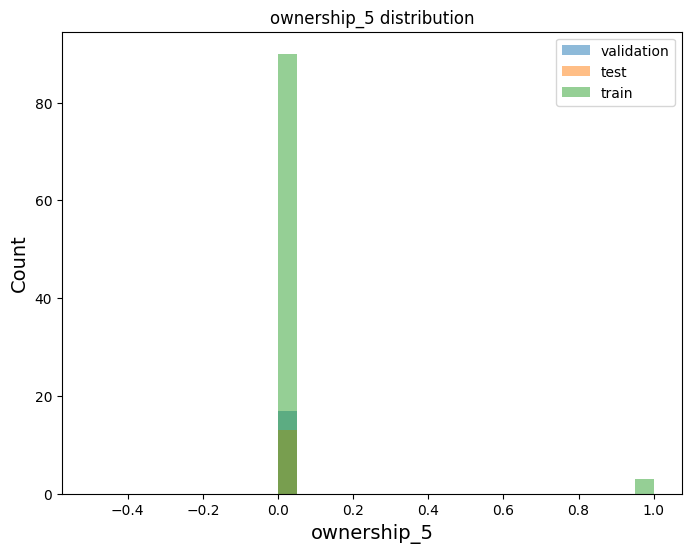

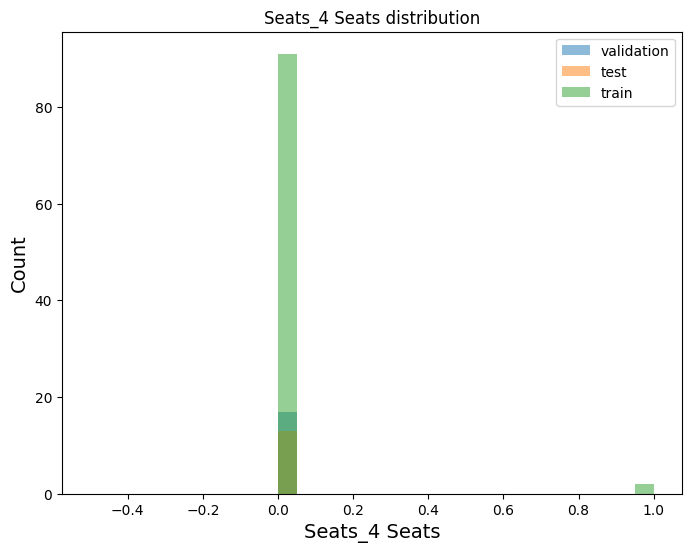

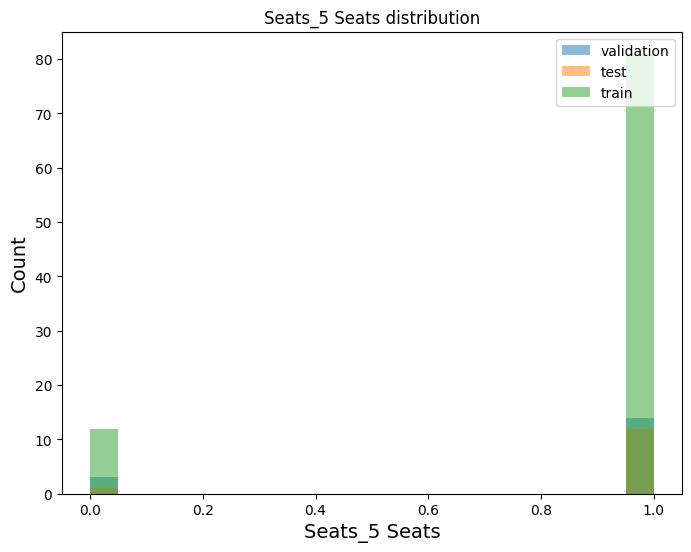

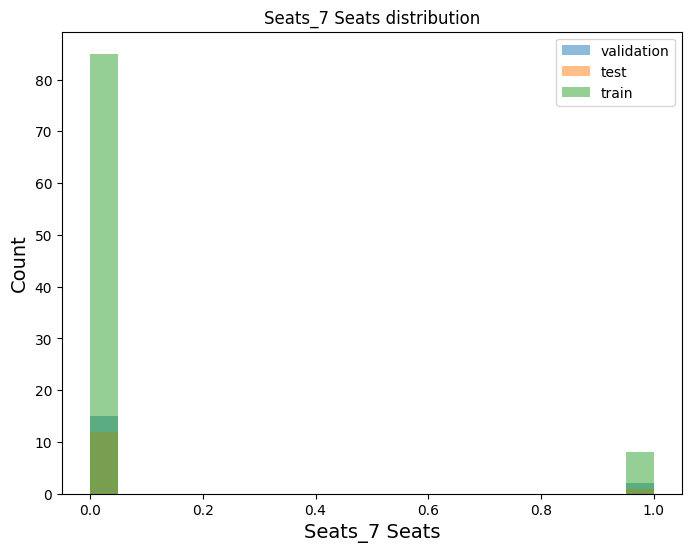

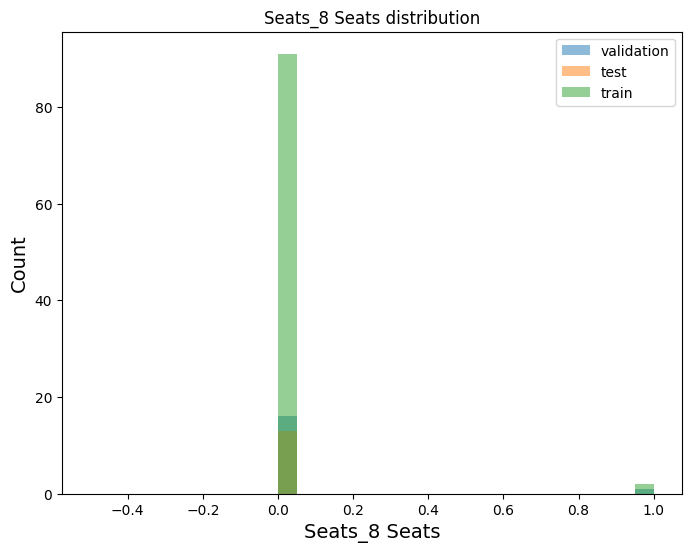

In [206]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
        "kms_driven",
            "engine",
            "age",
            "fuel_type_Diesel", "fuel_type_Lpg",  "fuel_type_Petrol",
            "transmission_Automatic", "transmission_Manual",
            "ownership_1",  "ownership_2",  "ownership_3",  "ownership_4",  "ownership_5",
            "Seats_4 Seats",	"Seats_5 Seats",	"Seats_7 Seats",	"Seats_8 Seats"
    ]
]

X_val_plot = X_val[
    [
        "kms_driven",
            "engine",
            "age",
            "fuel_type_Diesel", "fuel_type_Lpg",  "fuel_type_Petrol",
            "transmission_Automatic", "transmission_Manual",
            "ownership_1",  "ownership_2",  "ownership_3",  "ownership_4",  "ownership_5",
            "Seats_4 Seats",	"Seats_5 Seats",	"Seats_7 Seats",	"Seats_8 Seats"
    ]
]

X_train_plot = X_train[
    [
        "kms_driven",
            "engine",
            "age",
            "fuel_type_Diesel", "fuel_type_Lpg",  "fuel_type_Petrol",
            "transmission_Automatic", "transmission_Manual",
            "ownership_1",  "ownership_2",  "ownership_3",  "ownership_4",  "ownership_5",
            "Seats_4 Seats",	"Seats_5 Seats",	"Seats_7 Seats",	"Seats_8 Seats"
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

1.   The division of dataset in Test, train and validation sets looks just fine.
2.   No missing values in categorial variables.

## Linear Regression

In [207]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [208]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

## Making Predictions

In [209]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.06
Coefficient of determination: 0.21
R^2 score on tarining set = 0.20875254139110844


In [210]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.05
Coefficient of determination: -0.06
R^2 score on test set = -0.05724331038682373


In [211]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.07
Coefficient of determination: -1.09
R^2 score on validation set = -1.0884184935389314


# Understanding the important features

In [212]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.2065 ± 0.2691,age
0.1259 ± 0.2931,engine
0.0856 ± 0.1125,ownership_3
0.0561 ± 0.1258,fuel_type_Petrol
0.0199 ± 0.0828,fuel_type_Lpg
0.0112 ± 0.0170,kms_driven
0.0109 ± 0.0339,ownership_2
0.0013 ± 0.0883,ownership_1
0 ± 0.0000,transmission_Manual
0 ± 0.0000,transmission_Automatic


# Answer the following questions:

## 1.What are the data types? (Only numeric and categorical)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_prices_in_rupee  123 non-null    float64
 1   kms_driven           123 non-null    float64
 2   fuel_type            123 non-null    object 
 3   transmission         123 non-null    object 
 4   ownership            123 non-null    int64  
 5   engine               123 non-null    float64
 6   Seats                123 non-null    object 
 7   age                  123 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 8.6+ KB


**Numeric:** car_prices_in_rupee,kms_driven,ownership,engine,age

**Categorial:** fuel_type,transmission,Seats

## 2.Are there missing values?

In [215]:
df.isnull().sum()

car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
engine                 0
Seats                  0
age                    0
dtype: int64

There are no missing values

## 3.What are the likely distributions of the numeric variables?

We can answer this question by looking at thw Q-Q Plot. All of them have normal distribution. Ownership and Seats have more outliers.

## 4.Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

1. Age
2. kms_driven
3. ownership

## 5.Which independent variables have missing data? How much?

None of the independent variables have missing data.

## 6.Do the training and test sets have the same data?

Data that was split into Training set was 76.5%, Validation set was 13.5% and Test set was 10%

## 7.In the predictor variables independent of all the other predictor variables?

Yes

## 8.Which predictor variables are the most important?

From any of the above analysis that were did, we can say that "car_prices_in_rupee" is mostly dependent on "age", followed by "kms_driven".

## 9.Do the ranges of the predictor variables make sense?

Some predictor variables ranges like "car_prices_in_rupee" and "kms_driven" didn't make semse, so we transformed it in "Data transforming, Feature creation and Analysis" section. Steps involved:

1. Normalize numeric features
2. One-hot encode categorical features

## 10.Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [216]:
import numpy as np
from scipy import stats

# remove non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Removing outliers using the Z-score method
z = np.abs(stats.zscore(df_numeric))
df_zscore = df[(z < 3).all(axis=1)]

# Keeping outliers using the Z-score method
z = np.abs(stats.zscore(df_numeric))
df_zscore_keep = df[(z < 3).any(axis=1)]

print("Original dataframe:")
print(df)

print("\nRemoving outliers:")
print(df_zscore)

print("\nKeeping outliers:")
print(df_zscore_keep)

Original dataframe:
      car_prices_in_rupee  kms_driven fuel_type transmission  ownership  \
238              1.000000    0.278402    Petrol       Manual          3   
243              0.307697    0.315741    Petrol       Manual          3   
342              0.765827    0.241918    Petrol       Manual          4   
675              0.369236    0.203724    Petrol       Manual          1   
734              0.846167    0.278402    Petrol       Manual          2   
...                   ...         ...       ...          ...        ...   
5050             0.732965    0.600094    Petrol       Manual          2   
5094             0.593578    0.312503    Petrol       Manual          1   
5149             0.380560    0.697866       Lpg       Manual          2   
5177             0.932830    0.466085    Diesel       Manual          2   
5439             0.692318    0.427757    Diesel       Manual          3   

        engine    Seats       age  
238   0.228493  5 Seats  0.470588  
243   0

As the values seem same, I do not think that there will be any change in the final predictive model.

## 11.Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [218]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Create copies of the dataset to remove data randomly
df_1 = data.copy()
df_5 = data.copy()
df_10 = data.copy()

# Remove 1% of the data randomly
df_1 = df_1.sample(frac=0.99, random_state=1)

# Remove 5% of the data randomly
df_5 = df_5.sample(frac=0.95, random_state=1)

# Remove 10% of the data randomly
df_10 = df_10.sample(frac=0.9, random_state=1)

# Impute the missing values using mean imputation
imp_mean = SimpleImputer(strategy='mean')
df_1_mean = imp_mean.fit_transform(df_1)
df_5_mean = imp_mean.fit_transform(df_5)
df_10_mean = imp_mean.fit_transform(df_10)

# Impute the missing values using median imputation
imp_median = SimpleImputer(strategy='median')
df_1_median = imp_median.fit_transform(df_1)
df_5_median = imp_median.fit_transform(df_5)
df_10_median = imp_median.fit_transform(df_10)

# Impute the missing values using KNN imputation
imp_knn = KNNImputer()
df_1_knn = imp_knn.fit_transform(df_1)
df_5_knn = imp_knn.fit_transform(df_5)
df_10_knn = imp_knn.fit_transform(df_10)

# Calculate the % error on residuals for numeric data and check for bias and variance of the error for each imputation method
mse_mean = mean_squared_error(data.loc[df_1.index], df_1_mean, squared=False)
mse_median = mean_squared_error(data.loc[df_1.index], df_1_median, squared=False)
mse_knn = mean_squared_error(data.loc[df_1.index], df_1_knn, squared=False)
print("1% missing data - Mean imputation MSE: ", mse_mean)
print("1% missing data - Median imputation MSE: ", mse_median)
print("1% missing data - KNN imputation MSE: ", mse_knn)

mse_mean = mean_squared_error(data.loc[df_5.index], df_5_mean, squared=False)
mse_median = mean_squared_error(data.loc[df_5.index], df_5_median, squared=False)
mse_knn = mean_squared_error(data.loc[df_5.index], df_5_knn, squared=False)
print("5% missing data - Mean imputation MSE: ", mse_mean)
print("5% missing data - Median imputation MSE: ", mse_median)
print("5% missing data - KNN imputation MSE: ", mse_knn)

mse_mean = mean_squared_error(data.loc[df_10.index], df_10_mean, squared=False)
mse_median = mean_squared_error(data.loc[df_10.index], df_10_median, squared=False)
mse_knn = mean_squared_error(data.loc[df_10.index], df_10_knn, squared=False)
print("10% missing data - Mean imputation MSE: ", mse_mean)
print("10% missing data - Median imputation MSE: ", mse_median)
print("10% missing data - KNN imputation MSE: ", mse_knn)


1% missing data - Mean imputation MSE:  0.0
1% missing data - Median imputation MSE:  0.0
1% missing data - KNN imputation MSE:  0.0
5% missing data - Mean imputation MSE:  0.0
5% missing data - Median imputation MSE:  0.0
5% missing data - KNN imputation MSE:  0.0
10% missing data - Mean imputation MSE:  0.0
10% missing data - Median imputation MSE:  0.0
10% missing data - KNN imputation MSE:  0.0


## 12.For categorical data, calculate the accuracy and a confusion matrix.

In [224]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Create a copy of the dataset to remove data randomly
df = data.copy()

# Remove 10% of the data randomly
df = df.sample(frac=0.9, random_state=1)

# Impute the missing values using mode imputation for categorical data
imp_mode = SimpleImputer(strategy='most_frequent')
df = imp_mode.fit_transform(df)

# Encode the categorical features using one-hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
df_enc = enc.fit_transform(df[:, :-1])  # exclude the target variable from encoding
df_enc = np.concatenate([df_enc.toarray(), df[:, -1].reshape(-1, 1)], axis=1)  # concatenate the encoded features and the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_enc[:, :-1], df_enc[:, -1], test_size=0.2, random_state=1)

# Train a decision tree classifier on the imputed data
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy and confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion matrix:\n", cm)


Accuracy: 0.9565217391304348
Confusion matrix:
 [[22  0]
 [ 1  0]]


# References

**References:**


1. https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction/code
2. https://www.w3schools.com/python/pandas/
3. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
4. https://www.youtube.com/watch?v=fYhr8eF1ubo
5. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

# License

**MIT License**

Copyright (c) 2023 Aashay Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.